In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("salary.csv")

In [5]:
print(df)

       age  education.num  capital.gain  hours.per.week income
0       90              9             0              40  <=50K
1       82              9             0              18  <=50K
2       66             10             0              40  <=50K
3       54              4             0              40  <=50K
4       41             10             0              40  <=50K
...    ...            ...           ...             ...    ...
32556   22             10             0              40  <=50K
32557   27             12             0              38  <=50K
32558   40              9             0              40   >50K
32559   58              9             0              40  <=50K
32560   22              9             0              20  <=50K

[32561 rows x 5 columns]


In [7]:
df.shape

(32561, 5)

In [43]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(df.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [45]:
x= df.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [47]:
y= df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.25, random_state= 0)

## Feature scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

array([[ 1.27591266, -1.98305776, -0.14509813, -0.03923011],
       [-1.43485534, -0.42608063, -0.14509813, -1.25599461],
       [-1.14179934, -0.03683634, -0.14509813, -0.44481828],
       ...,
       [ 0.39674466, -0.03683634, -0.14509813,  1.1775344 ],
       [ 1.42244067, -0.42608063, -0.14509813,  0.77194623],
       [ 1.20264866, -0.03683634, -0.14509813,  0.36635806]])

 ## finding k value

Text(0, 0.5, 'Mean Error')

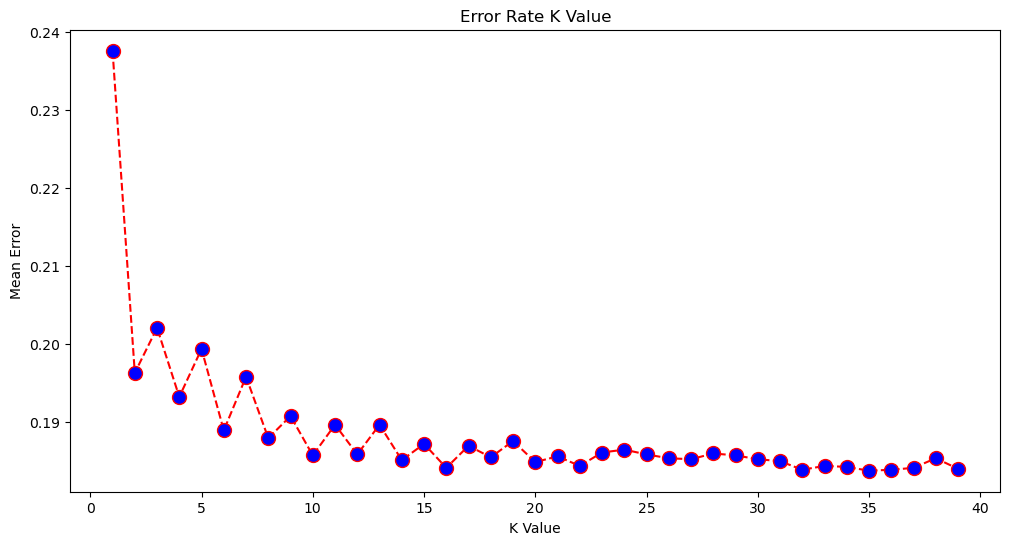

In [95]:
error =[]

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    pred_i= model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## model training 

In [75]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=16)

## prediction of new employee's salary

In [83]:
age = int(input("Enter the employee's age :  "))
edu = int(input("Enter the eployee's education : "))
cg= int(input("Enter the employee's capital gain : "))
wh= int(input("Enter the employee's working hours : "))
newemp= [[age,edu,cg,wh]]
result = model.predict(sc.transform(newemp))
print(result)

if(result == 1):
    print("The salary of the empployee should be above 50k ")
else:
    print("The salary of the empployee should not be above 50k")

Enter the employee's age :   20
Enter the eployee's education :  12
Enter the employee's capital gain :  2000
Enter the employee's working hours :  40


[1]
The salary of the empployee should be above 50k 


In [85]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test,y_pred)

print("Confusion Matrix : ")
print(cm)

print("Accurecy of the model is : {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix : 
[[5883  310]
 [1189  759]]
Accurecy of the model is : 81.58702862056259%
